# Continues to Discrete

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## SCIPY C2D

c:\Users\j4000774\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


(0.0, 5.0, 0.0, 1.4)

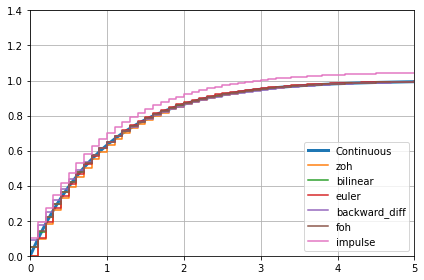

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete, lti, dlti, dstep
# Define a continuous state-space system.
num=[1]
den=[1,1]
A = np.array([[0, 1],[-10., -3]])
B = np.array([[0],[10.]])
C = np.array([[1., 0]])
D = np.array([[0.]])
# l_system = lti(A, B, C, D)
l_system = lti(num,den)
t, x = l_system.step(T=np.linspace(0, 5, 1000))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)
# Transform it to a discrete state-space system using several methods.

dt = 0.1
for method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
   d_system = cont2discrete((num,den), dt, method=method)
   # d_system = cont2discrete((A, B, C, D), dt, method=method)
   s, x_d = dstep(d_system)
   ax.step(s, np.squeeze(x_d), label=method, where='post')
ax.axis([t[0], t[-1], x[0], 1.4])
ax.legend(loc='best')
fig.tight_layout()
plt.grid()
plt.show()

## Control C2D

In [12]:
import control as ct
sys = ct.tf(1, [1, 1])
print("Continues")
sys
delta_t=0.2
# "gbt", "bilinear", "euler", "backward_diff",
#                   "zoh", "matched"
# 'zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse'
sysd_zoh = sys.sample(delta_t, method='zoh')
print("sysd_zoh")
sysd_zoh
sysd_bilinear = sys.sample(delta_t, method='bilinear')
print("sysd_bilinear")
sysd_bilinear
sysd_euler = sys.sample(delta_t, method='euler')
print("sysd_euler")
sysd_euler
sysd_backward_diff = sys.sample(delta_t, method='backward_diff')
print("sysd_backward_diff")
sysd_backward_diff
sysd_foh = sys.sample(delta_t, method='foh')
print("sysd_foh")
sysd_foh
sysd_impulse = sys.sample(delta_t, method='impulse')
print("sysd_impulse")
sysd_impulse


Continues


TransferFunction(array([1]), array([1, 1]))

sysd_zoh


TransferFunction(array([0.18126925]), array([ 1.        , -0.81873075]), 0.2)

sysd_bilinear


TransferFunction(array([0.09090909, 0.09090909]), array([ 1.        , -0.81818182]), 0.2)

sysd_euler


TransferFunction(array([0.2]), array([ 1. , -0.8]), 0.2)

sysd_backward_diff


TransferFunction(array([0.16666667, 0.        ]), array([ 1.        , -0.83333333]), 0.2)

sysd_foh


TransferFunction(array([0.09365377, 0.08761548]), array([ 1.        , -0.81873075]), 0.2)

sysd_impulse


TransferFunction(array([2.00000000e-01, 1.11022302e-16]), array([ 1.        , -0.81873075]), 0.2)

(0.0, 5.0)

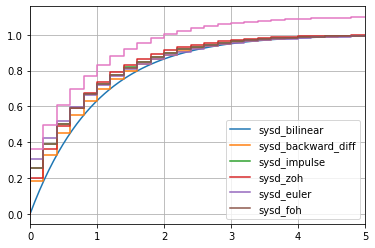

In [13]:
t,step=ct.step_response(sys)
plt.plot(t,step)
t,zoh=ct.step_response(sysd_zoh)
plt.step(t,zoh)
t,bilinear=ct.step_response(sysd_bilinear)
plt.step(t,bilinear)
t,euler=ct.step_response(sysd_euler)
plt.step(t,euler)
t,backward_diff=ct.step_response(sysd_backward_diff)
plt.step(t,backward_diff)
t,foh=ct.step_response(sysd_foh)
plt.step(t,foh)
t,impulse=ct.step_response(sysd_impulse)
plt.step(t,impulse)
plt.legend({'sysd_zoh','sysd_bilinear','sysd_euler','sysd_backward_diff','sysd_foh','sysd_impulse'})
# left=0
# right=5
plt.xlim(left=0,right=5)
plt.grid()
plt.show()

Text(600, 0.6, 'frequencies higher than half\nthe sampling rate\nalias to lower frequencies')

Text(0.5, 0, 'Input frequency [Hz]')

Text(0, 0.5, 'Magnitude H(s)')

Text(0.5, 1.0, 'The zero-order hold transfer function')

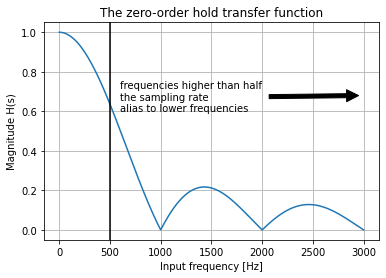

In [14]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(1, 3000, 1000)
w = 2*np.pi*f
s = 1j*w
T = 0.001
H_s = (1-np.exp(-s*T))/(s*T)
mag = np.abs(H_s)
phase = np.angle(H_s, deg=True)

plt.plot(f, mag)
plt.axvline(x=500, color='k')
plt.annotate('frequencies higher than half\nthe sampling rate\nalias to lower frequencies', 
             xy=(3000,0.68), xytext=(600, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Input frequency [Hz]')
plt.ylabel('Magnitude H(s)')
plt.title('The zero-order hold transfer function')
plt.grid()
plt.show()

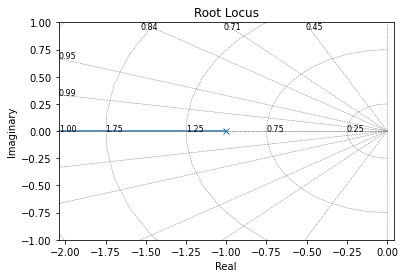

In [15]:
num=[1]
den=[1,1]
G=ct.tf(num,den)

roots,gains=ct.root_locus(G)


TransferFunction(array([1, 0]), array([1, 1]))

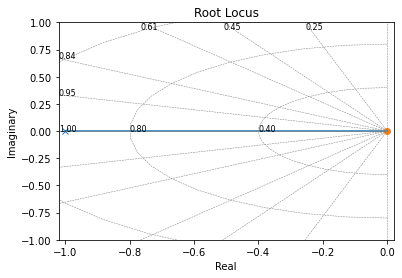

In [16]:
s = ct.TransferFunction.s
num=s
den=s+1
G=num/den
G

# ct.step_response(G).plot()
# response.plot()
roots,gains=ct.root_locus(G)


Text(0.5, 0, 'Frequency [Hz]')

Text(0, 0.5, 'Magnitude [dB]')

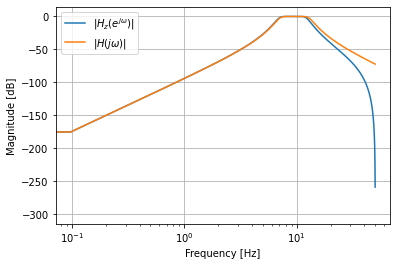

In [17]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
fs = 100
bf = 2 * np.pi * np.array([7, 13])

filts = signal.lti(*signal.butter(4, bf, btype='bandpass',
                                  analog=True))
filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))

wz, hz = signal.freqz(filtz.num, filtz.den)
ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)


plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)),
             label=r'$|H_z(e^{j \omega})|$')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)),
             label=r'$|H(j \omega)|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

In [23]:
#C2d METHOD 'zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse'
s = ct.TransferFunction.s

G=1/s
G
# Ts=1
G_Z=ct.c2d(G,Ts=2,method='zoh')
print("zoh")
G_Z

G_Z=ct.c2d(G,Ts=2,method='bilinear')
print("bilinear")
G_Z

G_Z=ct.c2d(G,Ts=1,method='euler')
print("euler")
G_Z


G_Z=ct.c2d(G,Ts=1,method='backward_diff')
print("backward_diff")
G_Z

G_Z=ct.c2d(G,Ts=1,method='foh')
print("foh")
G_Z

G_Z=ct.c2d(G,Ts=1,method='impulse')
print("impulse")
G_Z

TransferFunction(array([1]), array([1, 0]))

zoh


TransferFunction(array([2.]), array([ 1., -1.]), 2)

bilinear


TransferFunction(array([1., 1.]), array([ 1., -1.]), 2)

euler


TransferFunction(array([1.]), array([ 1., -1.]), 1)

backward_diff


TransferFunction(array([1., 0.]), array([ 1., -1.]), 1)

foh


TransferFunction(array([0.5, 0.5]), array([ 1., -1.]), 1)

impulse


TransferFunction(array([1., 0.]), array([ 1., -1.]), 1)

In [19]:
from sympy.physics.control.lti import TransferFunction, backward_diff,bilinear
# from sympy.physics.control.lti import 
from sympy.abc import s, L, R, T
tf = TransferFunction(1, s, s)
tf
numZ, denZ = bilinear(tf, T)
numZ
denZ

numZ, denZ = backward_diff(tf, T)
numZ
denZ

TransferFunction(1, s, s)

[T, T]

[2, -2]

[T, 0]

[1, -1]

In [20]:
from sympy.physics.control.lti import TransferFunction